<font size="5.5"><u><i>Populations Explorer</i></u></font>

<font size="4">Script to explore samples populations (run only if you have samples of the three classes)</font>
<br/>
<font size="4">Author: Manuel David Morales</font>

## 1. Library imports

In [32]:
# Data analysis
import numpy as np 
import pandas as pd

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

# Files/folders management
import os, glob, sys

# To read csv files
import csv

# Scientific computing
from scipy import signal

# Garbage collector
import gc

# Toolbox functions
from Toolbox import PSD, SNR, load_logdata

## 2. Input parameters

In [33]:
# Interferometer combination
# -------------------------------------------------------------------------------------
detectors = ["H1"]    # Options (combinations included): "L1", "H1", "V1"
# -------------------------------------------------------------------------------------

# Merge information about detectors
ifo_conf = ''.join(detectors)

## 3. Read files

In [34]:
# ------> Specify folder location

datasets_dir = '/home/manuel/Research Projects/GW Data analysis/GitHub/datagen-sngw-phen/Datasets/'

# Initialize list for log data
logdata_ifos = []

# Initialize list for strain segments
strain_segments = []

# Initialize No. of total injections count 
Num_injections_total = 0

# ------> Scan folder and load log data files

for ifo in detectors:
    
    print("****************** ", ifo, " DETECTOR ******************")
    print("***************************************************")
    print("")
    
    os.chdir(datasets_dir)

    for folder in glob.glob(ifo + "*"):
        print("SCANNING", folder, "FOLDER")
        print("------------------------------------------")

        # Initialize dictionary to distinguish classes
        populations = {}
    
        # Call function to load log data files
        populations, Num_injections = load_logdata(datasets_dir + folder, populations)
    
        strain_segments.append(populations)
    
        Num_injections_total += Num_injections

    print("***** Total number of loaded injections: ", Num_injections_total)
    print("")

******************  H1  DETECTOR ******************
***************************************************

SCANNING H1_1257050112 FOLDER
------------------------------------------

=======> SCANNING wfclass_2 SUBFOLDER

READING LOG DATA FILE
Log file location: /home/manuel/Research Projects/GW Data analysis/GitHub/datagen-sngw-phen/Datasets/H1_1257050112/wfclass_2/log.dat

Processed 508 lines


=======> SCANNING wfclass_1 SUBFOLDER

READING LOG DATA FILE
Log file location: /home/manuel/Research Projects/GW Data analysis/GitHub/datagen-sngw-phen/Datasets/H1_1257050112/wfclass_1/log.dat

Processed 440 lines


=======> SCANNING wfclass_3 SUBFOLDER

READING LOG DATA FILE
Log file location: /home/manuel/Research Projects/GW Data analysis/GitHub/datagen-sngw-phen/Datasets/H1_1257050112/wfclass_3/log.dat

Processed 508 lines


***** Total number of loaded injections:  1456



In [35]:
# ------> Some checks

print("Key of all noise segment dictionaries:")
print("----------------------------------------")

for i in range(len(strain_segments)):
    print(strain_segments[i].keys())

# Convert dict_keys to a list
class_list = list(strain_segments[i].keys())

Key of all noise segment dictionaries:
----------------------------------------
dict_keys(['class 2', 'class 1', 'class 3'])


## 4. Prepare data

In [36]:
# ------> Join together populations from different strain segments

# Initialize dictionaries for each population

wf_SNR = {}; Slope = {}; f_ini = {}; f_end = {}; wf_duration = {}

# Loop 1: For waveform classes
for class_label in class_list:
    
    wf_SNR_list = []
    Slope_list = []
    f_ini_list = []
    f_end_list = []
    wf_duration_list = []
    
    # Lopp 2: For strain segments
    for iseg in range(len(strain_segments)):
        
        # Remark: indexes for each population, strain_segments[iseg][class_label][i]
        # i=0 Injection time | i=1 jitter  | i=2 waveform SNR
        # i=3 g-mode slope   | i=4 freq f0 | i=5 freq f1 | i=6 waveform duration
        
        wf_SNR_list = wf_SNR_list + strain_segments[iseg][class_label][2]
        Slope_list = Slope_list + strain_segments[iseg][class_label][3]
        f_ini_list = f_ini_list + strain_segments[iseg][class_label][4]
        f_end_list = f_end_list + strain_segments[iseg][class_label][5]
        wf_duration_list = wf_duration_list + strain_segments[iseg][class_label][6]
    
    wf_SNR[class_label] = wf_SNR_list
    Slope[class_label] = Slope_list
    f_ini[class_label] = f_ini_list
    f_end[class_label] = f_end_list
    wf_duration[class_label] = wf_duration_list

In [37]:
# ------> Convert lists to numpy arrays, clear memory from lists

wf_SNR_c1 = np.array(wf_SNR["class 1"], dtype='float64')
wf_SNR_c2 = np.array(wf_SNR["class 2"], dtype='float64')
wf_SNR_c3 = np.array(wf_SNR["class 3"], dtype='float64')
print("No. of wf_SNR elements")
print("------------------------")
print("Class 1 =", len(wf_SNR_c1), "| Class 2 =", len(wf_SNR_c2), "| Class 3 =", len(wf_SNR_c3))
print("")

Slope_c1 = np.array(Slope["class 1"], dtype='float64')
Slope_c2 = np.array(Slope["class 2"], dtype='float64')
Slope_c3 = np.array(Slope["class 3"], dtype='float64')
print("No. of Slope elements")
print("-----------------------")
print("Class 1 =", len(Slope_c1), "| Class 2 =", len(Slope_c2), "| Class 3 =", len(Slope_c3))
print("")


f_ini_c1 = np.array(f_ini["class 1"], dtype='float64')
f_ini_c2 = np.array(f_ini["class 2"], dtype='float64')
f_ini_c3 = np.array(f_ini["class 3"], dtype='float64')
print("No. of f0 elements")
print("--------------------")
print("Class 1 =", len(f_ini_c1), "| Class 2 =", len(f_ini_c2), "| Class 3 =", len(f_ini_c3))
print("")

f_end_c1 = np.array(f_end["class 1"], dtype='float64')
f_end_c2 = np.array(f_end["class 2"], dtype='float64')
f_end_c3 = np.array(f_end["class 3"], dtype='float64')
print("No. of f1 elements")
print("--------------------")
print("Class 1 =", len(f_end_c1), "| Class 2 =", len(f_end_c2), "| Class 3 =", len(f_end_c3))
print("")

wf_duration_c1 = np.array(wf_duration["class 1"], dtype='float64')
wf_duration_c2 = np.array(wf_duration["class 2"], dtype='float64')
wf_duration_c3 = np.array(wf_duration["class 3"], dtype='float64')
print("No. of wf_duration elements")
print("-----------------------------")
print("Class 1 =", len(wf_duration_c1), "| Class 2 =", len(wf_duration_c2), "| Class 3 =", len(wf_duration_c3))
print("")

No. of wf_SNR elements
------------------------
Class 1 = 439 | Class 2 = 507 | Class 3 = 507

No. of Slope elements
-----------------------
Class 1 = 439 | Class 2 = 507 | Class 3 = 507

No. of f0 elements
--------------------
Class 1 = 439 | Class 2 = 507 | Class 3 = 507

No. of f1 elements
--------------------
Class 1 = 439 | Class 2 = 507 | Class 3 = 507

No. of wf_duration elements
-----------------------------
Class 1 = 439 | Class 2 = 507 | Class 3 = 507



## 5. Explore distributions

### 5.1. Signal-to-noise ratio (SNR)

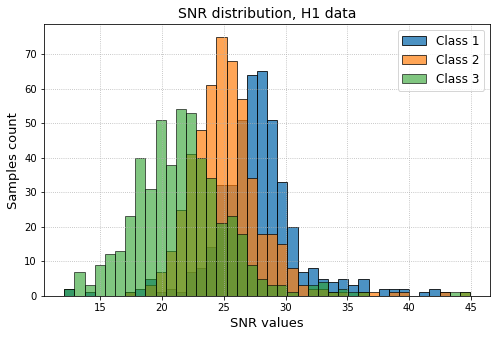

10540

<Figure size 432x288 with 0 Axes>

In [38]:
# ------> Signal-to-noise ratio

plt.figure(1, figsize=(8,5))

bins = np.histogram(np.hstack((wf_SNR_c1, wf_SNR_c2, wf_SNR_c3)), bins=40)[1]
                              
plt.hist(wf_SNR_c1, bins, label='Class 1', alpha=.8, edgecolor='black')
plt.hist(wf_SNR_c2, bins, label='Class 2', alpha=.7, edgecolor='black')
plt.hist(wf_SNR_c3, bins, label='Class 3', alpha=.6, edgecolor='black')

plt.title("SNR distribution, " + ifo_conf + " data", fontsize=14)
plt.ylabel("Samples count", fontsize=13)
plt.xlabel("SNR values", fontsize=13)
plt.grid(which='both', linestyle=':')

plt.legend(fontsize=12)

#plt.savefig("../../../Figures/" + ifo_conf + "_distribution_snr.pdf", format="pdf")
#plt.savefig("../../../Figures/" + ifo_cond + "_distribution_snr.eps", format="eps")

plt.show()
plt.figure(1).clear()
gc.collect()

### 5.2. Slope of the high frequency mode

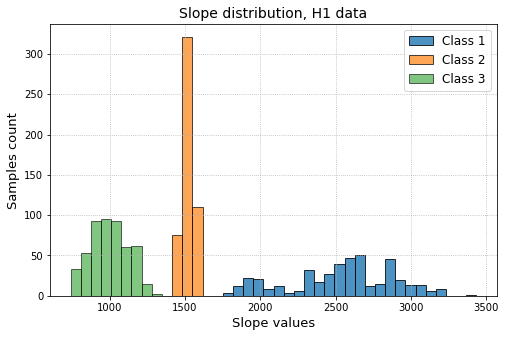

10488

<Figure size 432x288 with 0 Axes>

In [39]:
# ------> Slope of the high frequency mode

plt.figure(2, figsize=(8,5))

bins = np.histogram(np.hstack((Slope_c1, Slope_c2, Slope_c3)), bins=40)[1]

plt.hist(Slope_c1, bins=bins, label='Class 1', alpha=.8, edgecolor='black')
plt.hist(Slope_c2, bins=bins, label='Class 2', alpha=.7, edgecolor='black')
plt.hist(Slope_c3, bins=bins, label='Class 3', alpha=.6, edgecolor='black')

plt.title("Slope distribution, " + ifo_conf + " data", fontsize=14)
plt.ylabel("Samples count", fontsize=13)
plt.xlabel("Slope values", fontsize=13)
plt.grid(which='both', linestyle=':')

plt.legend(fontsize=12)

#plt.savefig("../../../Figures/" + ifo_conf + "_distribution_slope.pdf", format="pdf")
#plt.savefig("../../../Figures/" + ifo_conf + "_distribution_slope.eps", format="eps")

plt.show()
plt.figure(2).clear()
gc.collect()

### 5.3. Waveform duration

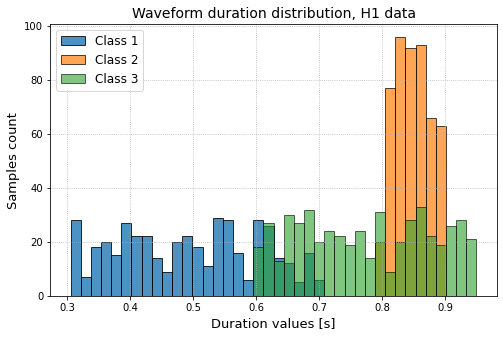

10488

<Figure size 432x288 with 0 Axes>

In [40]:
# ------> Waveform duration

plt.figure(3, figsize=(8,5))

bins = np.histogram(np.hstack((wf_duration_c1, wf_duration_c2, wf_duration_c3)), bins=40)[1]

plt.hist(wf_duration_c1, bins=bins, label='Class 1', alpha=.8, edgecolor='black')
plt.hist(wf_duration_c2, bins=bins, label='Class 2', alpha=.7, edgecolor='black')
plt.hist(wf_duration_c3, bins=bins, label='Class 3', alpha=.6, edgecolor='black')

plt.title("Waveform duration distribution, " + ifo_conf + " data", fontsize=14)
plt.ylabel("Samples count", fontsize=13)
plt.xlabel("Duration values [s]", fontsize=13)
plt.grid(which='both', linestyle=':')

plt.legend(fontsize=12)

#plt.savefig("../../../Figures/" + ifo_conf + "_distribution_wfduration.pdf", format="pdf")
#plt.savefig("../../../Figures/" + ifo_conf + "_distribution_wfduration.eps", format="eps")

plt.show()
plt.figure(3).clear()
gc.collect()

### 5.4. Frequency range (f1-f0)

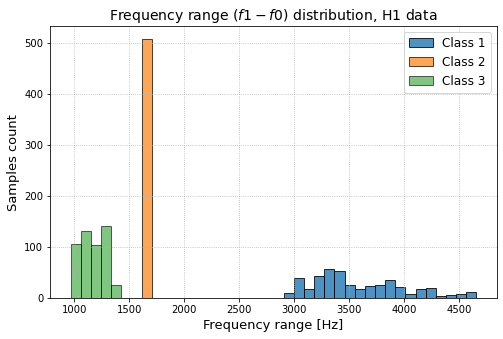

11359

<Figure size 432x288 with 0 Axes>

In [41]:
# ------> Initial frequencies

Deltaf_c1 = f_end_c1 - f_ini_c1
Deltaf_c2 = f_end_c2 - f_ini_c2
Deltaf_c3 = f_end_c3 - f_ini_c3

plt.figure(4, figsize=(8,5))

bins = np.histogram(np.hstack((Deltaf_c1, Deltaf_c2, Deltaf_c3)), bins=40)[1]

plt.hist(Deltaf_c1, bins=bins, label='Class 1', alpha=.8, edgecolor='black')
plt.hist(Deltaf_c2, bins=bins, label='Class 2', alpha=.7, edgecolor='black')
plt.hist(Deltaf_c3, bins=bins, label='Class 3', alpha=.6, edgecolor='black')

plt.title("Frequency range ($f1-f0$) distribution, " + ifo_conf + " data", fontsize=14)
plt.ylabel("Samples count", fontsize=13)
plt.xlabel("Frequency range [Hz]", fontsize=13)
plt.grid(which='both', linestyle=':')

plt.legend(fontsize=12)

#plt.savefig("../../Figures/" + ifo_conf + "_distribution_Deltaf.pdf", format="pdf")
#plt.savefig("../../Figures/" + ifo_conf + "_distribution_Deltaf.eps", format="eps")

plt.show()
plt.figure(4).clear()
gc.collect()